In [7]:
print('hello world')

hello world


In [46]:
import h5py
import numpy as np
np.set_printoptions(threshold=np.inf)

filename = "C:/Users/megha/Documents/Padilla-Coreano/SLEAP/CAGE2_TUBETEST_2.4v2.1_BLACKMICE.mp4.predictions.000_CAGE2_TUBETEST_2.4v2.1.analysis.h5"

with h5py.File(filename, "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

print("===filename===")
print(filename)
print()

print("===HDF5 datasets===")
print(dset_names)
print()

print("===locations data shape===")
print(locations.shape)
print()

print("===nodes===")

for i, name in enumerate(node_names):
    print(f"{i}: {name}")
print()

===filename===
C:/Users/megha/Documents/Padilla-Coreano/SLEAP/CAGE2_TUBETEST_2.4v2.1_BLACKMICE.mp4.predictions.000_CAGE2_TUBETEST_2.4v2.1.analysis.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(563, 5, 2, 2)

===nodes===
0: nose
1: eye
2: ear
3: front_shoulder
4: tailbase



In [47]:
frame_count, node_count, _, instance_count = locations.shape

print("frame count:", frame_count)
print("node count:", node_count)
print("instance count:", instance_count)

frame count: 563
node count: 5
instance count: 2


In [48]:
from scipy.interpolate import interp1d

def fill_missing(Y, kind="linear"):
    """Fills missing values independently along each dimension after the first."""

    # Store initial shape.
    initial_shape = Y.shape

    # Flatten after first dim.
    Y = Y.reshape((initial_shape[0], -1))
    print (Y.shape)
    # Interpolate along each slice.
    # 7 mice, 2 dimensions (x,y), 5 nodes - 70 data for each frame
    for i in range(Y.shape[-1]):
        y = Y[:, i]
        print()
        print(f'iteration {i}, y shape {y.shape}')
        # Build interpolant.
        x = np.flatnonzero(~np.isnan(y))
        print(f'x shape: {x.shape}, y[x] shape: {y[x].shape}')
        f = interp1d(x, y[x], kind=kind, fill_value=np.nan, bounds_error=False)

        # Fill missing
        xq = np.flatnonzero(np.isnan(y))
        y[xq] = f(xq)
        
        # Fill leading or trailing NaNs with the nearest non-NaN values
        mask = np.isnan(y)
        y[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), y[~mask])

        # Save slice
        Y[:, i] = y

    # Restore to initial shape.
    Y = Y.reshape(initial_shape)
    return Y
locations = fill_missing(locations)

(563, 20)

iteration 0, y shape (563,)
x shape: (367,), y[x] shape: (367,)

iteration 1, y shape (563,)
x shape: (404,), y[x] shape: (404,)

iteration 2, y shape (563,)
x shape: (367,), y[x] shape: (367,)

iteration 3, y shape (563,)
x shape: (404,), y[x] shape: (404,)

iteration 4, y shape (563,)
x shape: (448,), y[x] shape: (448,)

iteration 5, y shape (563,)
x shape: (455,), y[x] shape: (455,)

iteration 6, y shape (563,)
x shape: (448,), y[x] shape: (448,)

iteration 7, y shape (563,)
x shape: (455,), y[x] shape: (455,)

iteration 8, y shape (563,)
x shape: (441,), y[x] shape: (441,)

iteration 9, y shape (563,)
x shape: (444,), y[x] shape: (444,)

iteration 10, y shape (563,)
x shape: (441,), y[x] shape: (441,)

iteration 11, y shape (563,)
x shape: (444,), y[x] shape: (444,)

iteration 12, y shape (563,)
x shape: (446,), y[x] shape: (446,)

iteration 13, y shape (563,)
x shape: (483,), y[x] shape: (483,)

iteration 14, y shape (563,)
x shape: (446,), y[x] shape: (446,)

iteration

In [49]:
locations.shape

(563, 5, 2, 2)

In [50]:

print(locations)

[[[[  88.00962067 1868.17407227]
   [ 871.51873779  887.91479492]]

  [[  60.17760849 1887.94665527]
   [ 828.03009033  848.35949707]]

  [[  15.74593258 1915.72344552]
   [ 788.21502686  797.19662664]]

  [[  19.75151615 1903.87219238]
   [ 835.56682092  844.21960449]]

  [[   7.68647575 1904.36682129]
   [ 763.38092041  779.7333374 ]]]


 [[[  88.00962067 1868.17407227]
   [ 871.51873779  887.91479492]]

  [[  60.17760849 1887.94665527]
   [ 828.03009033  848.35949707]]

  [[  15.74593258 1915.72344552]
   [ 788.21502686  797.19662664]]

  [[  19.75151615 1903.87219238]
   [ 835.56682092  844.21960449]]

  [[   7.68647575 1904.36682129]
   [ 763.38092041  779.7333374 ]]]


 [[[  88.00962067 1868.17407227]
   [ 871.51873779  887.91479492]]

  [[  60.17760849 1887.94665527]
   [ 828.03009033  848.35949707]]

  [[  15.74593258 1915.72344552]
   [ 788.21502686  797.19662664]]

  [[  19.75151615 1903.87219238]
   [ 835.56682092  844.21960449]]

  [[   7.68647575 1904.36682129]
   [ 763.38

In [51]:
locations = fill_missing(locations)

(563, 20)

iteration 0, y shape (563,)
x shape: (563,), y[x] shape: (563,)

iteration 1, y shape (563,)
x shape: (563,), y[x] shape: (563,)

iteration 2, y shape (563,)
x shape: (563,), y[x] shape: (563,)

iteration 3, y shape (563,)
x shape: (563,), y[x] shape: (563,)

iteration 4, y shape (563,)
x shape: (563,), y[x] shape: (563,)

iteration 5, y shape (563,)
x shape: (563,), y[x] shape: (563,)

iteration 6, y shape (563,)
x shape: (563,), y[x] shape: (563,)

iteration 7, y shape (563,)
x shape: (563,), y[x] shape: (563,)

iteration 8, y shape (563,)
x shape: (563,), y[x] shape: (563,)

iteration 9, y shape (563,)
x shape: (563,), y[x] shape: (563,)

iteration 10, y shape (563,)
x shape: (563,), y[x] shape: (563,)

iteration 11, y shape (563,)
x shape: (563,), y[x] shape: (563,)

iteration 12, y shape (563,)
x shape: (563,), y[x] shape: (563,)

iteration 13, y shape (563,)
x shape: (563,), y[x] shape: (563,)

iteration 14, y shape (563,)
x shape: (563,), y[x] shape: (563,)

iteration

In [52]:
#Visualize movement across video
EAR_INDEX = 2
FRONTSHOULDER_INDEX = 3
TAIL_INDEX = 4

head_loc = locations[:, EAR_INDEX, :, :]
front_loc = locations[:, FRONTSHOULDER_INDEX, :, :]
tail_loc = locations[:, TAIL_INDEX, :, :]

In [53]:
FRONTSHOULDER_INDEX = 3
TAIL_INDEX = 4

head_loc = locations[:, EAR_INDEX, :, :]
front_loc = locations[:, FRONTSHOULDER_INDEX, :, :]
tail_loc = locations[:, TAIL_INDEX, :, :]

In [54]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [55]:
sns.set('notebook', 'ticks', font_scale=1.2)
mpl.rcParams['figure.figsize'] = [15,6]

Text(0.5, 1.0, 'Front Shoulder tracks')

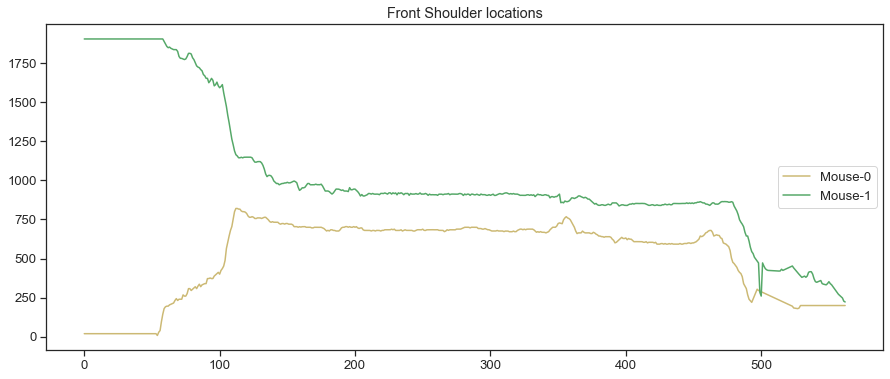

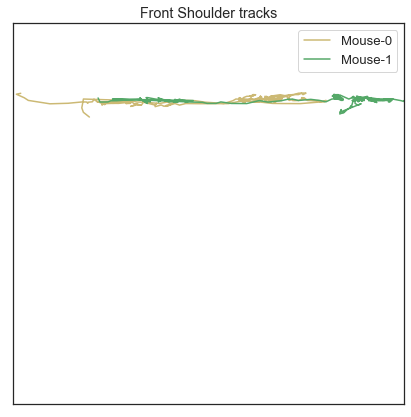

In [71]:
plt.figure()
plt.plot(front_loc[:,0,0], 'y',label='Mouse 2.4')
plt.plot(front_loc[:,0,1], 'g',label='Mouse 2.1')

#y coordinates which we don't really need since its a more of a one dimensional movement were interested in
#plt.plot(-1*front_loc[:,1,0], 'y')
#plt.plot(-1*front_loc[:,1,1], 'g')

plt.legend(loc="center right")
plt.title('Front Shoulder locations')


plt.figure(figsize=(7,7))
plt.plot(front_loc[:,0,0],front_loc[:,1,0], 'y',label='Mouse-0')
plt.plot(front_loc[:,0,1],front_loc[:,1,1], 'g',label='Mouse-1')
plt.legend()

plt.xlim(0,1024)
plt.xticks([])

plt.ylim(0,1024)
plt.yticks([])
plt.title('Front Shoulder tracks')

In [58]:
from scipy.signal import savgol_filter

def smooth_diff(node_loc, win=25, poly=3):
    """
    node_loc is a [frames, 2] array
    
    win defines the window to smooth over
    
    poly defines the order of the polynomial
    to fit with
    
    """
    node_loc_vel = np.zeros_like(node_loc)
    
    for c in range(node_loc.shape[-1]):
        node_loc_vel[:, c] = savgol_filter(node_loc[:, c], win, poly, deriv=1)
    
    node_vel = np.linalg.norm(node_loc_vel,axis=1)

    return node_vel

In [59]:
front_vel_mouse0 = smooth_diff(front_loc[:, :, 0])
front_vel_mouse1 = smooth_diff(front_loc[:, :, 1])

Text(0.5, 1.0, 'Velocity Mouse 0')

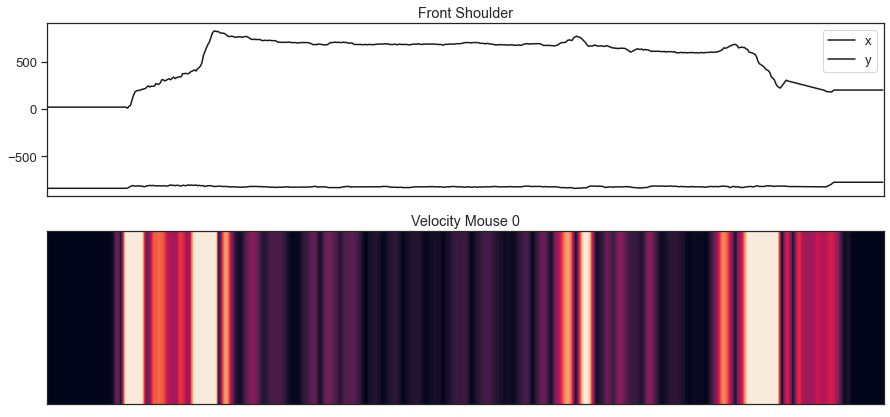

In [60]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(211)
ax1.plot(front_loc[:, 0, 0], 'k', label='x')
ax1.plot(-1*front_loc[:, 1, 0], 'k', label='y')
ax1.legend()
ax1.set_xticks([])
ax1.set_title('Front Shoulder')

ax2 = fig.add_subplot(212, sharex=ax1)
ax2.imshow(front_vel_mouse0[:,np.newaxis].T, aspect='auto', vmin=0, vmax=10)
ax2.set_yticks([])
ax2.set_title('Velocity Mouse 0')

Text(0.5, 1.0, 'Front Shoulders tracks colored by magnitude of mouse speed 0')

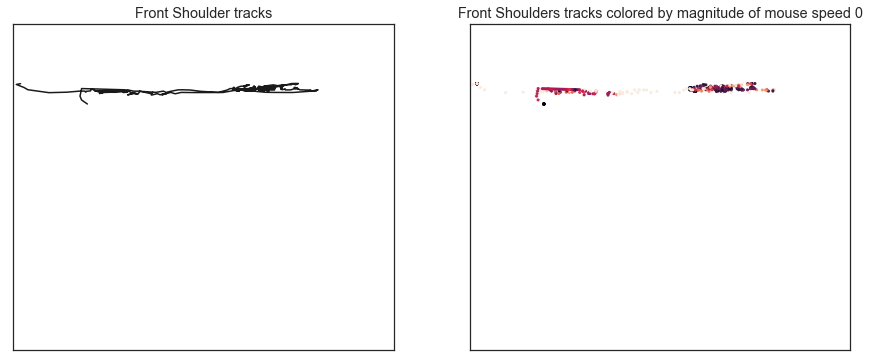

In [64]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.plot(front_loc[:, 0, 0], front_loc[:, 1, 0], 'k')
ax1.set_xlim(0,1024)
ax1.set_xticks([])
ax1.set_ylim(0,1024)
ax1.set_yticks([])
ax1.set_title('Front Shoulder tracks')

kp = front_vel_mouse0  # use thx_vel_fly1 for other fly
vmin = 0
vmax = 10

ax2 = fig.add_subplot(122)
ax2.scatter(front_loc[:,0,0], front_loc[:,1,0], c=kp, s=4, vmin=vmin, vmax=vmax)
ax2.set_xlim(0,1024)
ax2.set_xticks([])
ax2.set_ylim(0,1024)
ax2.set_yticks([])
ax2.set_title('Front Shoulders tracks colored by magnitude of mouse speed 0')

Text(0.5, 1.0, 'Front Shoulders tracks colored by magnitude of mouse speed 1')

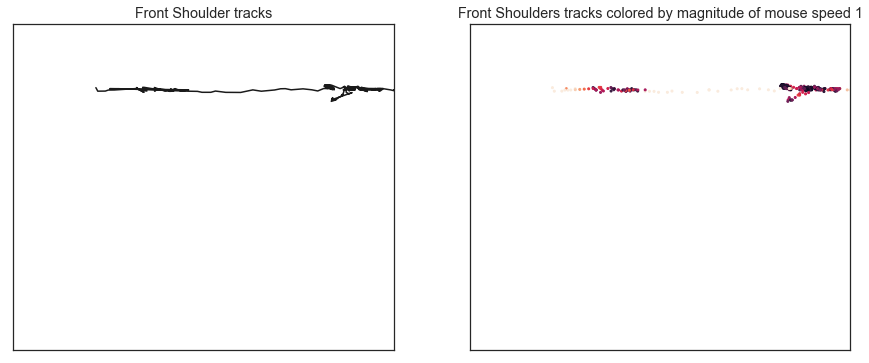

In [68]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.plot(front_loc[:, 0, 1], front_loc[:, 1, 1], 'k')
ax1.set_xlim(0,1024)
ax1.set_xticks([])
ax1.set_ylim(0,1024)
ax1.set_yticks([])
ax1.set_title('Front Shoulder tracks')

kp = front_vel_mouse1  # use thx_vel_fly1 for other fly
vmin = 0
vmax = 10

ax2 = fig.add_subplot(122)
ax2.scatter(front_loc[:,0,1], front_loc[:,1,1], c=kp, s=4, vmin=vmin, vmax=vmax)
ax2.set_xlim(0,1024)
ax2.set_xticks([])
ax2.set_ylim(0,1024)
ax2.set_yticks([])
ax2.set_title('Front Shoulders tracks colored by magnitude of mouse speed 1')

In [69]:
import pandas as pd

def corr_roll(datax, datay, win):
    """
    datax, datay are the two timeseries to find correlations between
    
    win sets the number of frames over which the covariance is computed
    
    """
    
    s1 = pd.Series(datax)
    s2 = pd.Series(datay)
    
    return np.array(s2.rolling(win).corr(s1))

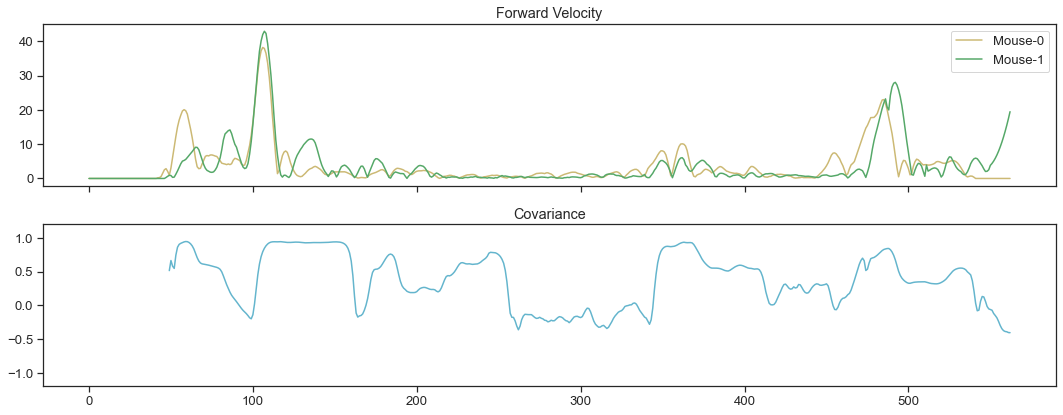

In [70]:
win = 50

cov_vel = corr_roll(front_vel_mouse0, front_vel_mouse1,win)

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15,6))
ax[0].plot(front_vel_mouse0, 'y', label='Mouse-0')
ax[0].plot(front_vel_mouse1, 'g', label='Mouse-1')
ax[0].legend()
ax[0].set_title('Forward Velocity')
#what is "forward" velocity? when one goes forward the other goes backward? 

ax[1].plot(cov_vel, 'c', markersize=1)
ax[1].set_ylim(-1.2, 1.2)
ax[1].set_title('Covariance')

fig.tight_layout()